In [1]:
import mxnet as mx
import numpy as np
import mxnet.contrib.onnx as onnx_mxnet
from mxnet.contrib.onnx.onnx2mx.import_model import import_model
from matplotlib import pyplot as plt

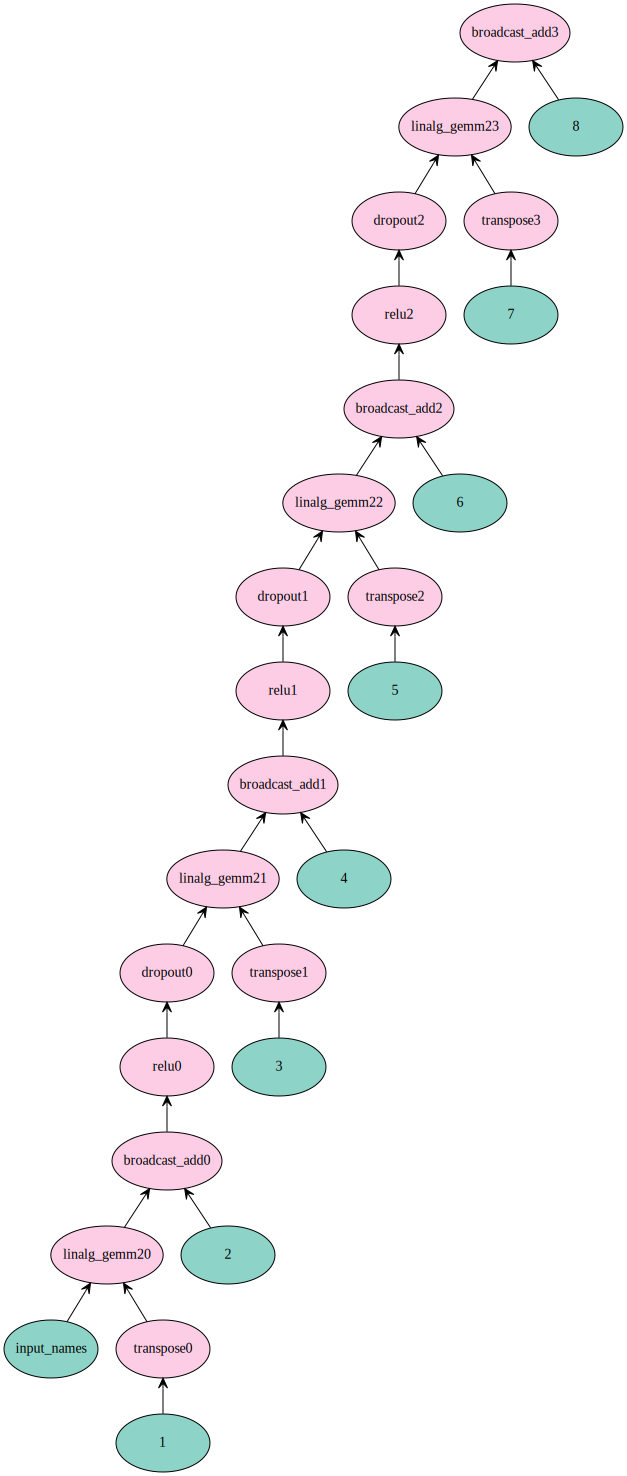

In [2]:
ctx = mx.cpu()
sym, arg, aux = onnx_mxnet.import_model('model.onnx')
mx.viz.plot_network(sym, node_attrs={"shape":"oval","fixedsize":"false"})

In [5]:
data_names = [graph_input for graph_input in sym.list_inputs()
                      if graph_input not in arg and graph_input not in aux]
mod = mx.mod.Module(symbol=sym, data_names=data_names, context=mx.cpu(), label_names=None)
mod.bind(for_training=False, data_shapes=[('input_names',(1,1))])
mod.set_params(arg_params=arg, aux_params=aux, allow_missing=True, allow_extra=True)

Y_t = []
for x in np.linspace(-1.1,2.5,1000):
    aligned = [x]
    input_blob = np.expand_dims(aligned, axis=0)
    data = mx.nd.array(input_blob)
    db = mx.io.DataBatch(data=(data,))
    mod.forward(db, is_train=False)
    result = mod.get_outputs()
    Y_t.append(result[0][0].asnumpy())

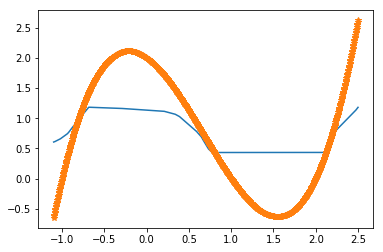

In [6]:
X = np.linspace(-1.1,2.5,1000)
plt.plot(X, np.asarray(Y_t))
Y = (X - 1) * (X + 1) * (X - 2)
plt.plot(X, Y, '*')